In [ ]:
# !pip install mpld3

In [1]:
# 출처
### https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

## `SEIR 모델`

<br>

`SEIR 모델`은 기존 `SIR 모델`과 달리 미감염자(S)가 감염병에 노출될 때 바로 감염되는 것이 아니라, 
노출 후 잠복기(E)를 거친 후 감염자(I)가 되는 모델이다.

SEIR 모델의 `S`, `E`, `I`, `R`은 다음과 같다.

`S (Susceptible)` == `미감염자의 수`. 전염병에 노출되었을 때 감염될 가능성이 있는 사람들의 수

`E (Exposed)` == `잠복기인 사람의 수`. 노출 후 잠복기를 거치는 사람의 수

`I (Infected)` == `감염자의 수`. 전염병에 감염된 사람들의 수

`R (Recovered)` == `완치자의 수`. 감염되었지만 회복되거나 사망한 사람들의 수

`N (Total Population) = S + E + I + R`

SEIR 모델은 전체 인구를 S + E + I + R = N으로 나누어 모델링합니다. 시간이 지남에 따라 미감염자 수 (S)는 노출자 수 (E)와 감염자 수 (I)에 비례하여 감소합니다. 노출자 수 (E)는 시간이 지남에 따라 미감염자들 (S)과의 접촉이 일어날 때 잠복기를 거치게 되어 감염자 수 (I)에 추가됩니다. 감염자 수 (I)는 노출자들과 미감염자들과의 접촉이 일어나 감염자 수가 증가합니다. 완치자들(R)의 수는 감염자 수에 비례하여 증가합니다.

SEIR 모델은 시간에 따른 S, E, I, R의 변화를 각각의 수학적 방정식으로 모델링하고, 이를 토대로 전염병의 전파 과정을 예측하고 대처방안을 모색할 수 있습니다. SEIR 모델은 실제로 많은 전염병 모델링에 사용되며, 코로나19 대응 전략 수립 등에도 활용되고 있습니다.

## 1. SEIR 모델의 미분 방정식

`SEIR 모델의 미분 방정식`은 다음과 같이 나타낼 수 있습니다.

<br>

$$\large dS/dt = -\beta \times S \times I / N$$
$$\therefore 미감염자 수S는 감염확률 \beta와 감염자 수 I에 비례해 감소한다$$<br>
$$\large dE/dt = \beta \times S \times I / N - \delta \times E$$
$$\therefore 노출자 수E는 감염확률 \beta, 노출확률 \delta에 따라 감염되어 감염자 수 I로 전환되거나 회복되어 미감염자 수 S로 복귀한다$$<br>
$$\large dI/dt = \alpha \times E - \gamma \times I$$
$$\therefore 감염자 수I는 회복확률 \gamma에 비례해 감소한다$$<br>
$$\large dR/dt = \gamma \times I$$

such that

`dS/dt = 시간에 따른 미감염자 수의 변화율`<br>
`dE/dt = 시간에 따른 노출자 수의 변화율`<br>
`dI/dt = 시간에 따른 감염자 수의 변화율`<br>
`dR/dt = 시간에 따른 완치자 수의 변화율`<br>
$\beta$ = beta = 감염 확률 <br>
$\gamma$ = gamma = 회복 확률 <br>
$\delta$ = delta = 전염병에 노출될 확률 <br>
`N = 총 인구수`

In [14]:
def deriv(y, t, N, beta, gamma, delta): #t : 현재 시간
    S, E, I, R = y # y : S, E, I, R의 초기값을 담은 배열
    dSdt = -beta * S * I / N # S의 변화율
    dEdt = beta * S * I / N - delta * E #E의 변화율
    dIdt = delta * E - gamma * I #I의 변화율
    dRdt = gamma * I #R의 변화율
    return dSdt, dEdt, dIdt, dRdt

## 2. 모델 파라미터 가정

`N = 1_000_000 ==> 인원 1,000,000명의 모집단` <br>
`D = 4.0 ==> 감염은 4일간 지속한다.` <br>
`gamma = 1.0 / D ==> 회복률 : 4일간 점진적으로 치유, 값은 0.25`<br>
`delta = 1.0 / 7.0 ==> 잠복기 기간 = 7일` <br>
`R_0 = 3.0 ==> 기존 감염률: 5.0` <br>
`beta = R_0 * gamma ==> 감염자는 하루에 5 * 0.25 = 1.25명에게 병을 감염시킨다`<br>
`S0, E0, I0, R0 ==> 처음 모델을 시작할 때의 조건`

In [21]:
N = 1_000_000
D = 4.0
gamma = 1.0 / D
delta = 1.0 / 7.0
R_0 = 5.0
beta = R_0 * gamma
S0, E0, I0, R0 = N-1, 1, 0, 0

## 3. Train Model

`t = 발병일 0부터 100일까지의 경과 확인`

In [22]:
t = np.linspace(0, 99, 100)
y0 = S0, E0, I0, R0

ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = ret.T

In [23]:
S_ = []

for _ in S:
    S_.append(round(_, 2))
    
print(S_)

[999999.0, 999998.92, 999998.71, 999998.38, 999997.93, 999997.36, 999996.62, 999995.69, 999994.52, 999993.04, 999991.18, 999988.84, 999985.9, 999982.2, 999977.54, 999971.69, 999964.32, 999955.05, 999943.38, 999928.71, 999910.25, 999887.04, 999857.83, 999821.09, 999774.88, 999716.74, 999643.62, 999551.64, 999435.95, 999290.44, 999107.44, 998877.31, 998587.93, 998224.1, 997766.71, 997191.83, 996469.43, 995561.93, 994422.29, 992991.8, 991197.25, 988947.61, 986129.98, 982604.94, 978201.12, 972709.12, 965875.17, 957394.71, 946907.02, 933992.01, 918171.25, 898916.01, 875665.85, 847861.79, 814997.6, 776691.19, 732773.43, 683385.08, 629063.71, 570794.49, 509996.73, 448427.32, 388002.92, 330571.92, 277688.66, 230446.62, 189407.63, 154630.96, 125776.68, 102242.52, 83297.12, 68186.03, 56202.23, 46724.01, 39228.49, 33289.53, 28567.34, 24795.1, 21765.23, 19317.17, 17326.95, 15698.9, 14358.98, 13249.7, 12326.24, 11553.45, 10903.6, 10354.68, 9889.13, 9492.82, 9154.32, 8864.32, 8615.2, 8400.69, 8215.5

In [24]:
I_ = []

for _ in I:
    I_.append(round(_, 2))
    
print(I_)

[0.0, 0.12, 0.22, 0.31, 0.41, 0.52, 0.66, 0.83, 1.05, 1.32, 1.66, 2.09, 2.63, 3.31, 4.17, 5.25, 6.6, 8.3, 10.44, 13.14, 16.53, 20.79, 26.15, 32.9, 41.39, 52.06, 65.49, 82.38, 103.63, 130.35, 163.96, 206.23, 259.39, 326.23, 410.26, 515.9, 648.67, 815.49, 1025.05, 1288.19, 1618.45, 2032.69, 2551.89, 3202.03, 4015.15, 5030.61, 6296.4, 7870.57, 9822.58, 12234.4, 15201.0, 18829.81, 23238.36, 28549.36, 34882.23, 42340.12, 50992.12, 60851.12, 71849.54, 83817.01, 96466.19, 109393.26, 122098.39, 134026.88, 144625.82, 153405.75, 159994.13, 164170.11, 165874.9, 165199.48, 162355.59, 157638.49, 151389.07, 143960.77, 135693.97, 126898.62, 117844.18, 108755.51, 99813.01, 91155.56, 82885.05, 75071.62, 67759.03, 60969.7, 54709.33, 48970.81, 43737.64, 38986.69, 34690.46, 30818.82, 27340.42, 24223.73, 21437.8, 18952.79, 16740.38, 14773.98, 13028.84, 11482.14, 10112.96, 8902.22]


In [73]:
## 그래프로 나타내기

def plotseird(t, S, E, I, R, D=None, L=None, R0=None, Alpha=None, CFR=None):
    f, ax = plt.subplots(1,1, figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  
    if D is not None:
        ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
        ax.plot(t, S+E+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')
    else:
        ax.plot(t, S+E+I+R, 'c--', alpha=0.7, linewidth=2, label='Total')

    ax.set_xlabel('Time (days)')

    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
        
    if L is not None:
        plt.title("Lockdown after {} days".format(L))
        
    plt.show();

    if R0 is not None or CFR is not None:
        f = plt.figure(figsize=(12,4))
  
    if R0 is not None:
        # sp1
        ax1 = f.add_subplot(121)
        ax1.plot(t, R0, 'b--', alpha=0.7, linewidth=2, label='R_0')

        ax1.set_xlabel('Time (days)')
        ax1.title.set_text('R_0 over time')
        legend = ax1.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)

    if Alpha is not None:
        ax2 = f.add_subplot(122)
        ax2.plot(t, Alpha, 'r--', alpha=0.7, linewidth=2, label='alpha')

        ax2.set_xlabel('Time (days)')
        ax2.title.set_text('fatality rate over time')
        legend = ax2.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)

        plt.show();

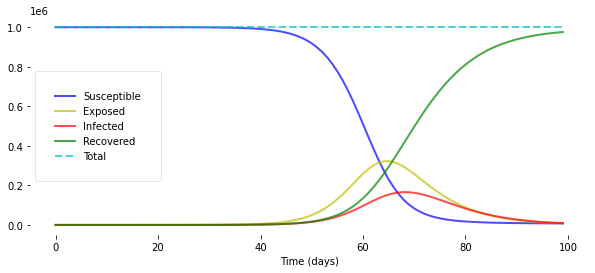

In [26]:
plotseird(t, S, E, I, R)

## 전염병 사망률 체크

`D (Deceased)` == `사망자 수` <br>
`alpha = 치명률` <br>
`rho = 감염 후 사망까지 걸리는 시간` <br>
`dDdt = alpha * rho * I = 감염자 수(I)에 대한 사망자 수(D)의 변화율`

In [74]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [75]:
N = 1_000_000
D = 4.0
gamma = 1.0 / D
delta = 1.0 / 7.0
R_0 = 5.0
beta = R_0 * gamma


alpha = 0.10  # 치명률 = 10%
rho = 1/8  # 감염 후 사망까지 평균 8일
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # 초기 condition

In [82]:
t = np.linspace(0, 99, 100)
y0 = S0, E0, I0, R0, D0

ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

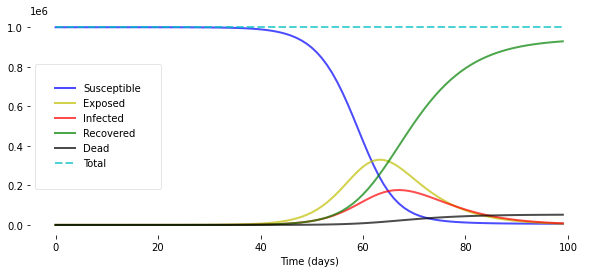

In [83]:
plotseird(t, S, E, I, R, D)

## 락다운/위드코로나

`L : Lockdown` or `W : 위드코로나`로<br>
기존 감염률 `R0`이 t에 따라 변하는 경우:

L = 40 -> 40일 이후 락다운 R0: 5.0 -> 0.9<br>
W = 80 -> 80일 이후 위드코로나 R0: 0.9 -> 50.0

In [84]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [88]:
L = 40
W = 80

In [92]:
N = 1_000_000
D = 4.0 
gamma = 1.0 / D
delta = 1.0 / 7.0

def R_0(t):
    if t < L:
        return 5.0
    elif L <= t < W:
        return 0.9
    else:
        return 50.0

def beta(t):
    return R_0(t) * gamma

alpha = 0.2 
rho = 1/8 
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0

In [93]:
t = np.linspace(0, 149, 150)
y0 = S0, E0, I0, R0, D0

ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

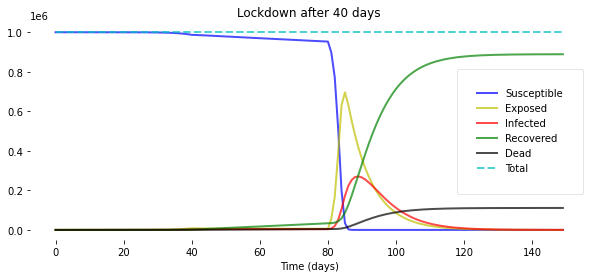

In [94]:
plotseird(t, S, E, I, R, D, L)

## 로지스틱 $R_{0}$

`감염률 R_0`이 t에 따라 갑자기 변하는 것이 아닌, <br>
logit함수에 따라 점진적으로 변하는 경우

In [95]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [ ]:
L = 60
W = 100

In [102]:
N = 1_000_000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 7.0  # incubation period of five days

R_0 = 5.0
k = 0.5
R_L = 0.9
R_W = 50.0

def logistic_R_0(t):
    if t < L:
        return (R_0 - R_L) / (1 + np.exp(-k * (-t + L))) + R_L
    elif L <= t < 80:
        return R_L
    else:
        return (R_W - R_L) / (1 + np.exp(-k * (-t + W))) + R_W
    
def beta(t):
    return logistic_R_0(t) * gamma

alpha = 0.1  # 20% death rate
rho = 1/8  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [103]:
t = np.linspace(0, 149, 150) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values

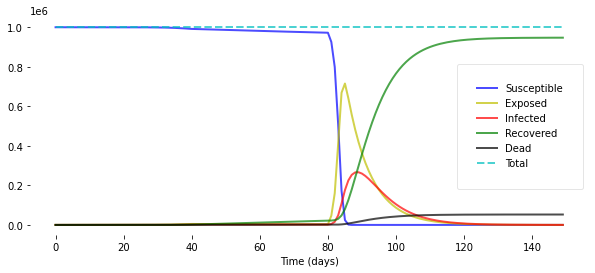

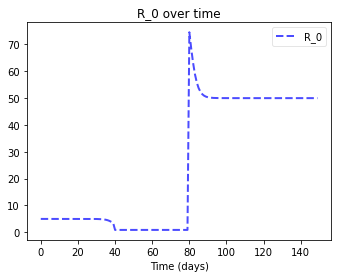

In [104]:
plotseird(t, S, E, I, R, D, R0=R0_over_time)

## 여러 다른 변수 고려

`alpha_by_agegroup` = 나이대에 따른 치사율<br>
`proportion_of_agegroup` = 나이대의 분포

In [40]:
def deriv(y, t, N, beta, gamma, delta, alpha_opt, rho):
    S, E, I, R, D = y
    def alpha(t):
        return s * I/N + alpha_opt

    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha(t)) * gamma * I - alpha(t) * rho * I
    dRdt = (1 - alpha(t)) * gamma * I
    dDdt = alpha(t) * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [41]:
N = 1_000_000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days

R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 0.5

def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma

alpha_by_agegroup = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.2, "89+": 0.3}
proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4, "89+": 0.2}
s = 0.01
alpha_opt = sum(alpha_by_agegroup[i] * proportion_of_agegroup[i] for i in list(alpha_by_agegroup.keys()))

rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [42]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha_opt, rho))
S, E, I, R, D = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values
Alpha_over_time = [s * I[i]/N + alpha_opt for i in range(len(t))]  # to plot alpha over time

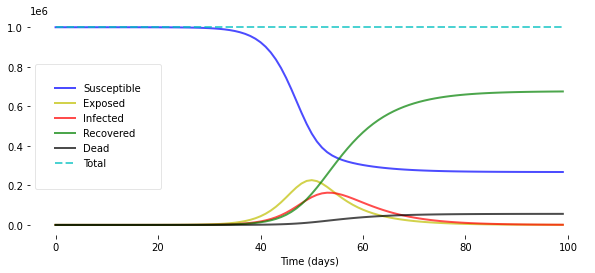

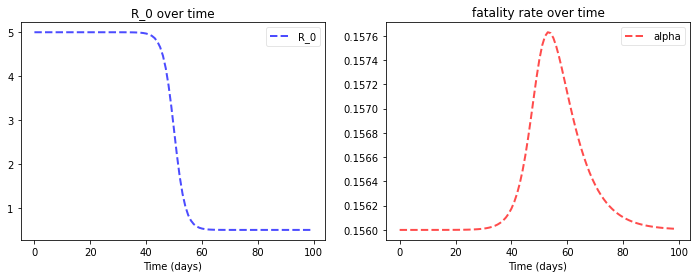

In [43]:
plotseird(t, S, E, I, R, D, R0=R0_over_time, Alpha=Alpha_over_time)